In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
#Change Directory
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Tsel_DSA/06_Python_Programming_III/')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Tsel_DSA/06_Python_Programming_III'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
#Load dataset
train = pd.read_csv('csv/train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [115]:
Data_dict = pd.DataFrame(train.dtypes)
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict['MissingVal'] = train.isnull().sum()
Data_dict['UniqueVal'] = train.nunique()
Data_dict['Count'] = train.count()
Data_dict

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [119]:
#convert categorical variable to string
train = train.astype({"PassengerId": str, "Survived": str, "Pclass" : str})#, "SibSp" : str, "Parch" : str})
train.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

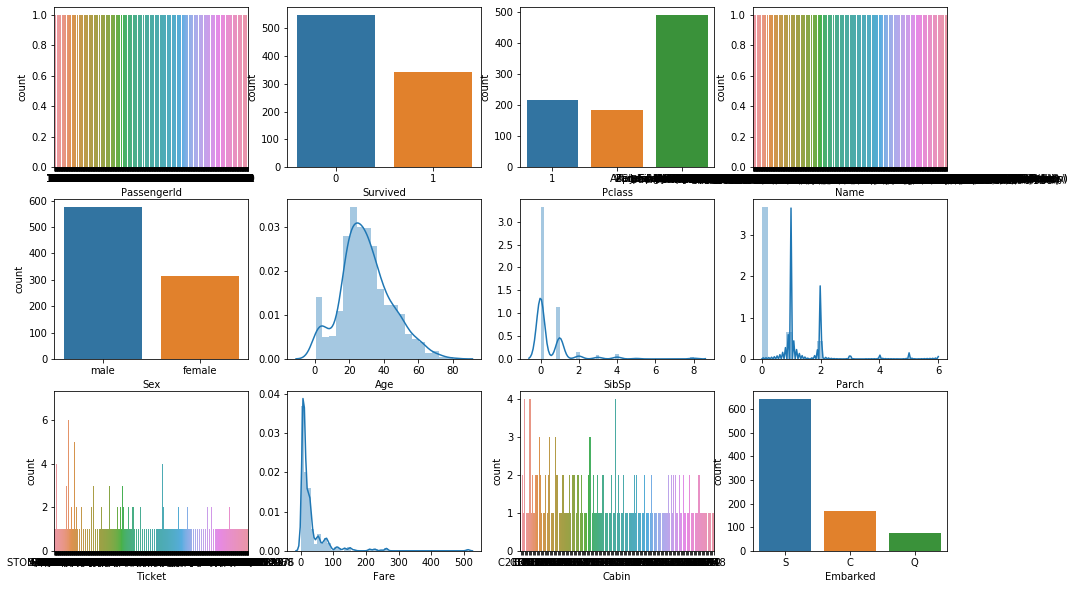

In [120]:
# Plot variable
dtype_tmp = train.dtypes
row=3
col=4
fig , axes = plt.subplots(row, col, figsize = (16,10) )
i=0
for j in range(0,row,1):
  for k in range(0,col,1):
    label = dtype_tmp.index[i]
    data_type=dtype_tmp.iloc[i]
    if(data_type=='object'):
      sns.countplot(label , data = train, ax = axes[j,k])
    else :
      sns.distplot(train[label].dropna() , ax = axes[j,k])
    i +=1

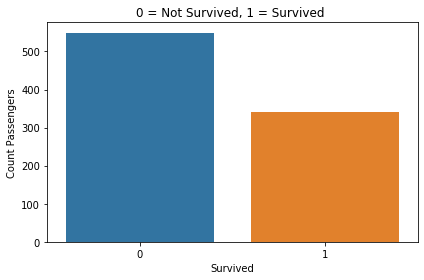

In [171]:
fig, x = plt.subplots()
sns.countplot(x='Survived' , data=train).set_title('0 = Not Survived, 1 = Survived ')
x.set(ylabel='Count Passengers')
plt.tight_layout()
plt.savefig('fig/survivor.png');

In [252]:
survived = train['Survived'].value_counts().reset_index(name='Count')
total = survived.Count/survived.Count.sum()
survived['pct']=total
survived

,index,Count,pct
0,0,549,0.616162
1,1,342,0.383838


In [257]:
import numpy as np
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for col in columns:
  survived = train[train.Survived=='1'][col].value_counts().reset_index(name='Count').sort_values(by='Count',ascending=False)
  survived=survived.rename(columns={'index':col})
  total = survived.Count/survived.Count.sum()
  survived['pct']=total
  print(survived)

  Pclass  Count       pct
0      1    136  0.397661
1      3    119  0.347953
2      2     87  0.254386
      Sex  Count       pct
0  female    233  0.681287
1    male    109  0.318713
   SibSp  Count       pct
0      0    210  0.614035
1      1    112  0.327485
2      2     13  0.038012
3      3      4  0.011696
4      4      3  0.008772
   Parch  Count       pct
0      0    233  0.681287
1      1     65  0.190058
2      2     40  0.116959
3      3      3  0.008772
4      5      1  0.002924
  Embarked  Count       pct
0        S    217  0.638235
1        C     93  0.273529
2        Q     30  0.088235


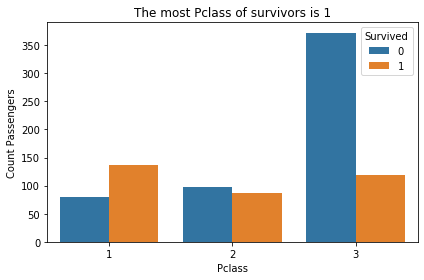

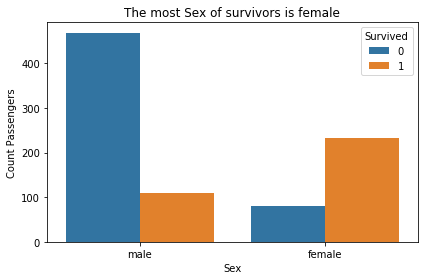

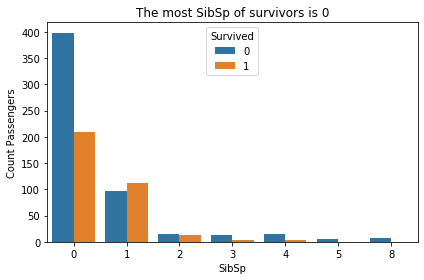

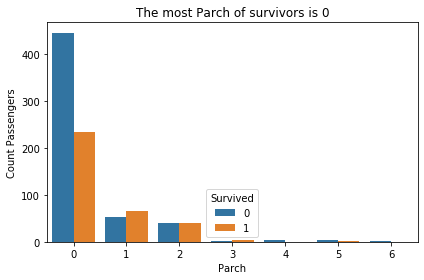

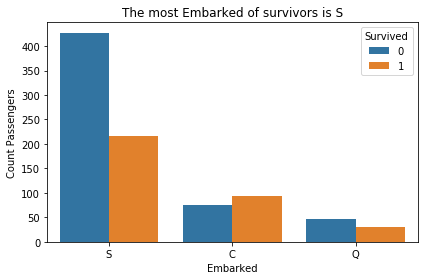

In [249]:
import numpy as np
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for col in columns:
  highest = train[train.Survived=='1'].groupby(['Survived',col])[col].count().reset_index(name='Count').sort_values(by='Count',ascending=False).iloc[0,1]
  fig, x = plt.subplots(sharey=True)
  sns.countplot(x=col, hue='Survived', data=train).set_title('The most '+col+' of survivors is ' + str(highest) )
  x.set(ylabel='Count Passengers')
  plt.tight_layout()
  plt.savefig('fig/survivor_'+col+'.png');

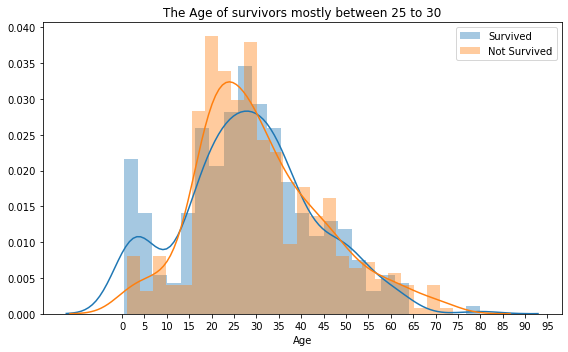

In [234]:
fig,x = plt.subplots(1, 1, figsize=(8,5))
sns.distplot(train[train.Survived=="1"]['Age'].dropna(),bins=25, label='Survived')
sns.distplot(train[train.Survived=="0"]['Age'].dropna(),bins=25, label='Not Survived')
x.legend(loc='upper right')
x.set_title("The Age of survivors mostly between 25 to 30")
x.set_xticks(range(0,100,5));
plt.tight_layout()
plt.savefig('fig/survivor_Age.png');

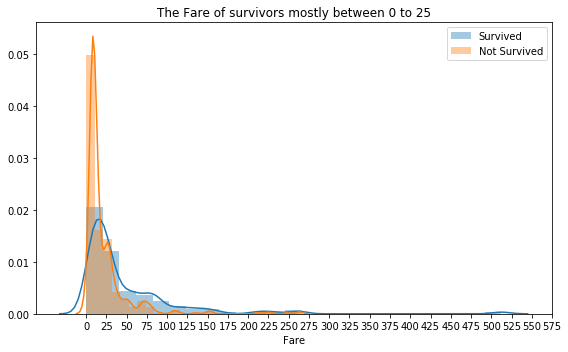

In [233]:
fig,x = plt.subplots(1, 1, figsize=(8,5))
sns.distplot(train[train.Survived=="1"]['Fare'].dropna(),bins=25, label='Survived')
sns.distplot(train[train.Survived=="0"]['Fare'].dropna(),bins=25, label='Not Survived')
x.legend(loc='upper right')
x.set_title("The Fare of survivors mostly between 0 to 25")
x.set_xticks(range(0,600,25))
plt.tight_layout()
plt.savefig('fig/survivor_Fare.png');